<h1><font color='green'> <center>Case Study on PUBG

<img src="http://www.photobackgroundhd.com/wp-content/uploads/2018/11/playerunknown-039-s-battlegrounds-3840x2160-playerunknowns-battlegrounds-2017-4k-10066-.jpg"/>

# Features (From kaggle)

PlayerUnknowns Battleground (Pubg) is a game where 100 playes drop onto a deserted island alone, with a partner, or with three others and seek to be the final one(s) standing. The goal is to predict the likelihood an individual will win based on a variety of statistics. 

The features as taken from the compeition's data page is:
* **DBNOs** - Number of enemy players knocked.
* **assists** - Number of enemy players this player damaged that were killed by teammates.
* **boosts** - Number of boost items used.
* **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
* **headshotKills** - Number of enemy players killed with headshots.
* **heals** - Number of healing items used.
* **Id** - Player’s Id
* **killPlace** - Ranking in match of number of enemy players killed.
* **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* **killStreaks** - Max number of enemy players killed in a short amount of time.
* **kills** - Number of enemy players killed.
* **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* **matchDuration** - Duration of match in seconds.
* **matchId** - ID to identify match. There are no matches that are in both the training and testing set.
* **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* **rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* **revives** - Number of times this player revived teammates.
* **rideDistance** - Total distance traveled in vehicles measured in meters.
* **roadKills** - Number of kills while in a vehicle.
* **swimDistance** - Total distance traveled by swimming measured in meters.
* **teamKills** - Number of times this player killed a teammate.
* **vehicleDestroys** - Number of vehicles destroyed.
* **walkDistance** - Total distance traveled on foot measured in meters.
* **weaponsAcquired** - Number of weapons picked up.
* **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* **numGroups** - Number of groups we have data for in the match.
* **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

<h2><font color='orange'>1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

<h2><font color='orange'>2 Reading data

In [2]:
train = pd.read_csv('train_V2.csv',nrows=500000)

In [3]:
train.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
# Stats
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,0.232488,1.109146,130.825331,0.657088,0.227080,1.368404,47.582600,507.064550,0.925588,0.545244,...,0.164242,605.696107,0.003656,4.524663,0.023734,0.007550,1155.025860,3.662304,609.002128,0.472753
std,0.587467,1.715940,171.117918,1.143812,0.600895,2.669700,27.467169,627.882529,1.556649,0.711681,...,0.468110,1491.295725,0.078985,30.396460,0.167484,0.090028,1183.242644,2.457405,740.205734,0.307403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.700000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,84.580000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,687.400000,3.000000,0.000000,0.458300
75%,0.000000,2.000000,186.000000,1.000000,0.000000,2.000000,71.000000,1173.000000,1.000000,1.000000,...,0.000000,0.223350,0.000000,0.000000,0.000000,0.000000,1978.000000,5.000000,1495.000000,0.740700
max,21.000000,33.000000,6616.000000,32.000000,40.000000,52.000000,100.000000,2152.000000,65.000000,14.000000,...,17.000000,31960.000000,9.000000,2295.000000,10.000000,4.000000,25780.000000,128.000000,2001.000000,1.000000


<b>This kernel features:</b>
- The Killers
       - Kill without movement
       - Road kils
       - more than 30 kills
       - 100% headshot
       - longest kills
   
- walkDistance
- rideDistance
- swimDistance
- rideDistance
- Healers & Boosts
- weapons
- Solos, Duos and Squads


<h2><font color='orange'>3. Data Exploration

<h3><font color='orange'>3.1 The Killer

<img src="https://i.ytimg.com/vi/rnAeX795Jn0/maxresdefault.jpg" style="width: 650px;"/>

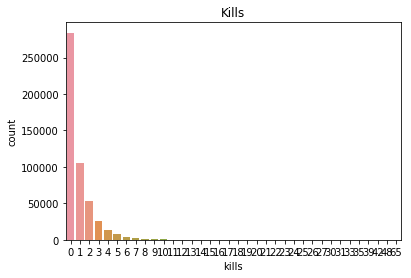

In [5]:
sns.countplot(train['kills']).set_title("Kills");

In [6]:
print("The average person kills {:.4f} players".format(train['kills'].mean()))

print("99% of people have {} kills or less".format(train['kills'].quantile(0.99)))
      
print("while the most kills ever recorded is {}.".format(train['kills'].max()))

The average person kills 0.9256 players
99% of people have 7.0 kills or less
while the most kills ever recorded is 65.


Let's plot the kill counts.

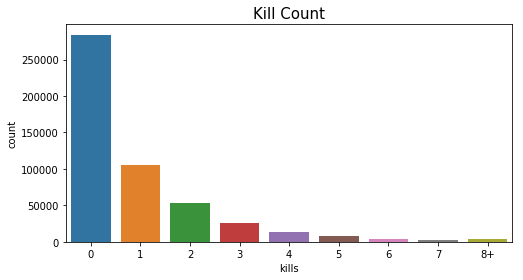

In [7]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(8,4))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

In [8]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 
                                                                    100*len(data[data['winPlacePerc']==1])/len(train)))

data1 = train[train['damageDealt'] == 0].copy()

print("{} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]),
                                                                     100*len(data1[data1['winPlacePerc']==1])/len(train)))

12689 players (2.5378%) have won without a single kill!
537 players (0.1074%) have won without dealing damage!


Plot win placement percentage vs kills.

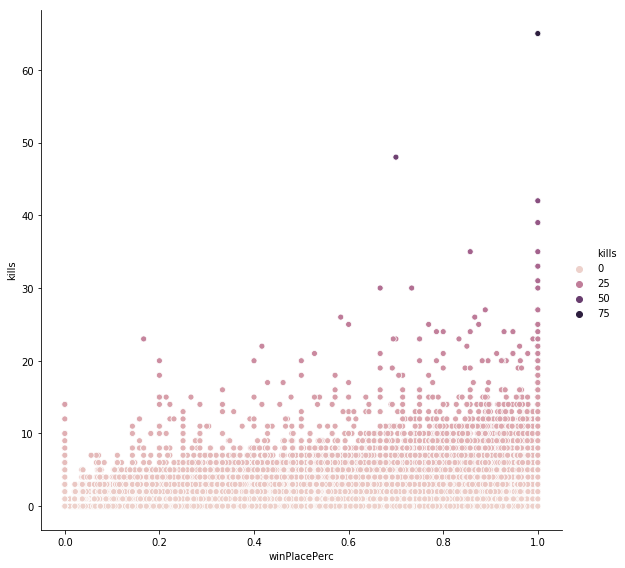

In [9]:
sns.relplot(x="winPlacePerc", y="kills", data=train,hue='kills',height=8)
plt.show()

<h3><font color='navy'>These things help from removing  cheating players

In [10]:
# Create feature totalDistance
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
# Create feature killsWithoutMoving
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))

In [11]:
# Create headshot_rate feature
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

<h2><font color='green'> Outlier Detection

<h4><font color='green'>3.1.2 Kills without movement

This is perhaps the most obvious sign of cheating in the game. It is already fishy if a player hasn't moved during the whole game, but the player could be AFK and got killed. However, if the player managed to get kills without moving it is most likely a cheater.

In [12]:
# Check players who kills without moving
display(train[train['killsWithoutMoving'] == True].shape)
train[train['killsWithoutMoving'] == True].head(5)

(179, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,0.0,True,0.0
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,0.0,True,0.0
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,0.0,True,0.2
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,0.0,True,0.0
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,0.0,True,1.0


In [13]:
# Remove outliers
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

<h4><font color='green'>3.1.3 Roadkills Outliers detection

In [14]:
# Players who got more than 10 roadKills
train[train['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate


In [15]:
# Drop roadKill 'cheaters'
train.drop(train[train['roadKills'] > 10].index, inplace=True)

<h4><font color='green'>3.1.4 More than 30 kills Outliers detection

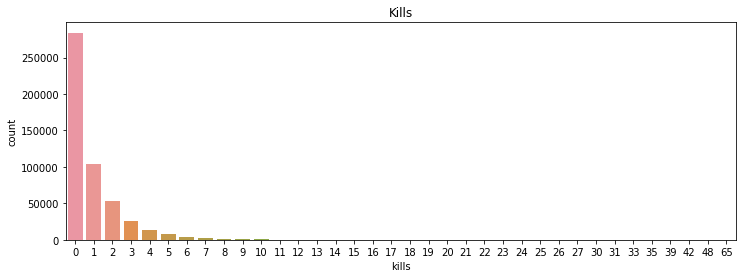

In [16]:
# Plot the distribution of kills
plt.figure(figsize=(12,4))
sns.countplot(data=train, x=train['kills']).set_title('Kills')
plt.show()

In [17]:
# Players who got more than 30 kills
display(train[train['kills'] > 30].shape)
train[train['kills'] > 30].head(10)

(9, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,0.0,0,0,48.82,48,1500,0.8571,48.82,False,0.200000
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,0.0,0,0,780.70,45,1500,1.0000,780.70,False,0.258065
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0.0,0,0,23.71,61,0,0.7000,23.71,False,0.250000
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,0.0,1,0,718.30,16,1500,1.0000,718.30,False,0.952381
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,0.0,0,0,71.51,41,0,1.0000,71.51,False,0.171429
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,0.0,0,0,1036.00,60,0,1.0000,1036.00,False,0.200000
353128,f3e9746e3ff151,4bc1f00f07b304,a9e84c456cc859,2,0,3834.0,0,9,5,1,...,0.0,0,0,124.20,42,0,1.0000,124.20,False,0.230769
457829,265e23756baa0b,9d94424171c2a1,664dee9ed8f646,3,0,2907.0,0,27,2,1,...,0.0,1,0,382.40,15,0,1.0000,382.40,False,0.818182
488335,31a0682922ef45,275a27a3ee4cc8,3037f74ef8a3a3,2,0,3055.0,0,9,0,1,...,0.0,0,0,35.30,31,1500,1.0000,35.30,False,0.272727


In [18]:
# Remove outliers
train.drop(train[train['kills'] > 30].index, inplace=True)

<h4><font color='green'>3.1.5 100% headshot rate Outliers detection

Again, we first take a look at the whole dataset and create a new feature 'headshot_rate'.
We see that the most players score in the 0 to 10% region. However, there are a few anomalies that have a headshot_rate of 100% percent with more than 9 kills!

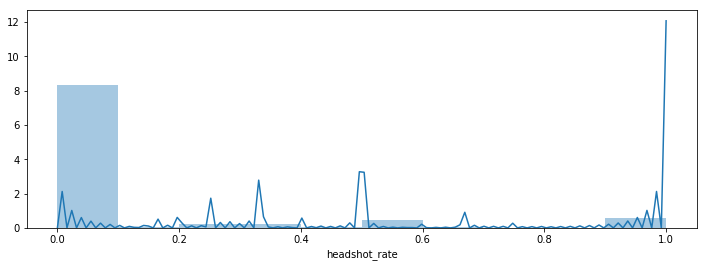

In [19]:
# Plot the distribution of headshot_rate
plt.figure(figsize=(12,4))
sns.distplot(train['headshot_rate'], bins=10)
plt.show()

In [20]:
# Players who made a minimum of 10 kills and have a headshot_rate of 100%
display(train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].shape)
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].head(10)

(2, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0.0,0,0,2939.0,5,0,0.8462,2939.0,False,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,0.0,0,0,3422.0,8,1560,1.0000,8142.0,False,1.0


<h4><font color='green'>3.1.6 Longest kill

Most kills are made from a distance of 100 meters or closer. There are however some outliers who make a kill from more than 1km away. This is probably done by cheaters.

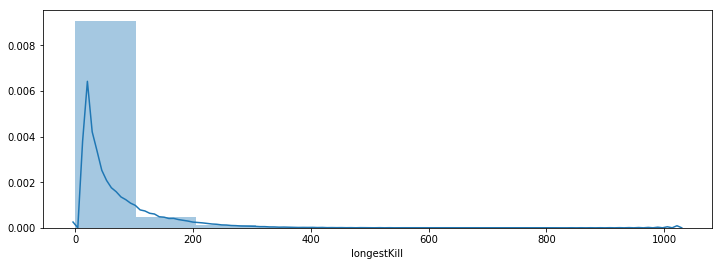

In [21]:
# Plot the distribution of longestKill
plt.figure(figsize=(12,4))
sns.distplot(train['longestKill'], bins=10)
plt.show()

Let's take a look at the players who make these shots.

In [22]:
# Check out players who made kills with a distance of more than 1 km
display(train[train['longestKill'] >= 1000].shape)
train[train['longestKill'] >= 1000].head(10)

(3, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,0.0,0,1,3052.00,9,0,0.9231,3775.20,False,0.250000
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0.0,0,0,48.87,38,1500,0.5385,48.87,False,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,0.0,0,0,1264.00,26,0,1.0000,2981.00,False,0.000000


In [23]:
# Remove outliers
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

<h2><font color='orange'>3.2 walkDistance

<img src="https://steemitimages.com/DQmRmYLRxu1vUhVtnFAA6bHFbShtr7Wdv1wLrPjdxbRZsjc/maxresdefault%20(2).jpg" alt="The Runners" style="width: 650px;"/>

In [24]:
print("The average person walks for {:.1f}m".format(train['walkDistance'].mean()))

print("99% of people have walked {}m or less".format(train['walkDistance'].quantile(0.99)))

print("while the marathoner champion walked for {}m.".format(train['walkDistance'].max()))

The average person walks for 1155.5m
99% of people have walked 4397.0m or less
while the marathoner champion walked for 25780.0m.


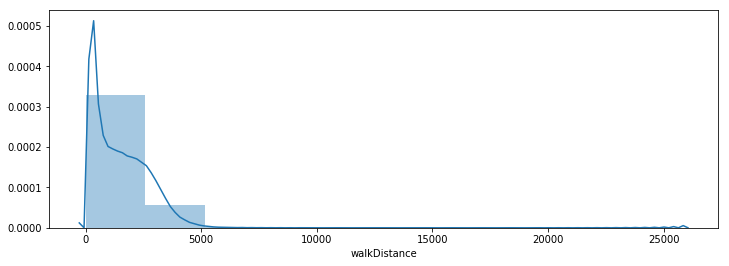

In [25]:
# Plot the distribution of walkDistance
plt.figure(figsize=(12,4))
sns.distplot(train['walkDistance'], bins=10)
plt.show()

In [26]:
print("{} players ({:.4f}%) walked 0 meters.".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

print("This means that they die before even taking a step or they are afk (more possible)")

10988 players (2.0022%) walked 0 meters.
This means that they die before even taking a step or they are afk (more possible)


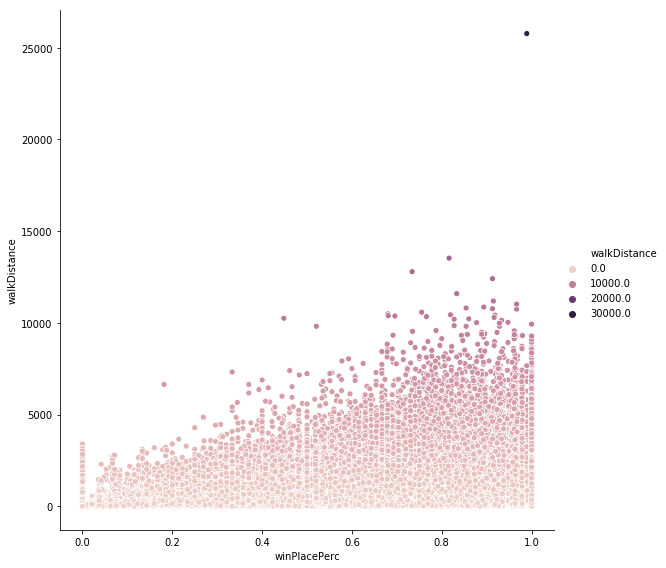

In [27]:
sns.relplot(x="winPlacePerc", y="walkDistance",  data=train,hue="walkDistance", height=8)
plt.show()

Apparently walking has a high correlation with winPlacePerc.

<h3><font color='green'>3.2.1 Outliers

In [28]:
# walkDistance anomalies
display(train[train['walkDistance'] >= 10000].shape)
train[train['walkDistance'] >= 10000].head(10)

(25, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,9.882,0,0,13530.0,7,0,0.8163,13540.3032,False,0.0
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.22,0,0,1,34,...,40.870,0,0,10030.0,7,1533,0.9474,10070.9073,False,0.0
49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4,117.20,1,0,1,24,...,36.750,0,0,12410.0,3,0,0.9130,12446.7588,False,0.0
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.34,0,0,1,46,...,45.820,0,0,11590.0,3,1563,0.8333,12483.6200,False,0.0
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1,73.08,0,0,3,27,...,45.630,0,0,10440.0,6,1488,0.8194,11490.6300,False,0.0
125103,db5a0cdc969dcb,50cc466757950e,c306a9745c4c1d,0,4,37.73,0,0,7,47,...,38.760,0,0,12790.0,5,1500,0.7340,12828.7978,False,0.0
136421,955e60b09a96b1,30df08fe22a901,8669d01725f135,0,1,0.00,0,0,1,46,...,30.810,0,0,10370.0,3,0,0.6957,12223.8100,False,0.0
136476,0d75d05b5c988c,3da040ce77cd0b,65bc5211a569dd,0,3,0.00,0,0,0,41,...,197.200,0,0,10140.0,5,1772,0.9333,14918.2000,False,0.0
154080,7e8a71d23381cd,e2c9f4f92840b2,a721de1aa05408,0,3,0.00,0,0,13,46,...,16.700,0,0,10220.0,4,0,0.8602,12636.7000,False,0.0
154128,32fdde4c716787,390ae9a51c11b8,82610ed1b4d033,0,4,52.16,0,0,7,25,...,29.830,0,0,10860.0,6,0,0.8936,10889.8614,False,0.0


In [29]:
# Remove outliers
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)

<h2><font color='orange'>3.3 rideDistance

<img src="http://cdn.gamer-network.net/2018/metabomb/pubghowtodrivecarsandbikes.jpg" style="width: 750px;"/>

In [30]:
print("The average person drives for {:.1f}m".format(train['rideDistance'].mean()))

print("99% of people have drived {}m or less".format(train['rideDistance'].quantile(0.99)))

print("while the formula 1 champion drived for {}m.".format(train['rideDistance'].max()))

The average person drives for 605.9m
99% of people have drived 6925.0m or less
while the formula 1 champion drived for 31960.0m.


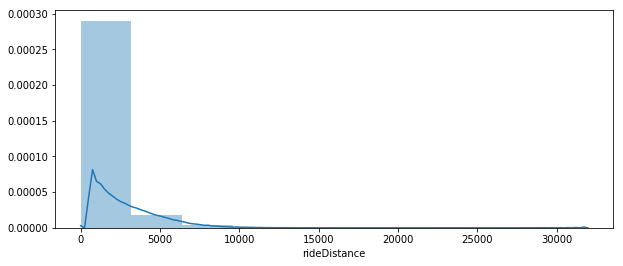

In [31]:
# Plot the distribution of rideDistance
plt.figure(figsize=(10,4))
sns.distplot(train['rideDistance'], bins=10)
plt.show()

In [32]:
print("{} players ({:.4f}%) drived for 0 meters.".format(len(data[data['rideDistance'] == 0]),
                                                         100*len(data1[data1['rideDistance']==0])/len(train)))

print("This means that they don't have a driving licence yet.")

370124 players (23.1538%) drived for 0 meters.
This means that they don't have a driving licence yet.


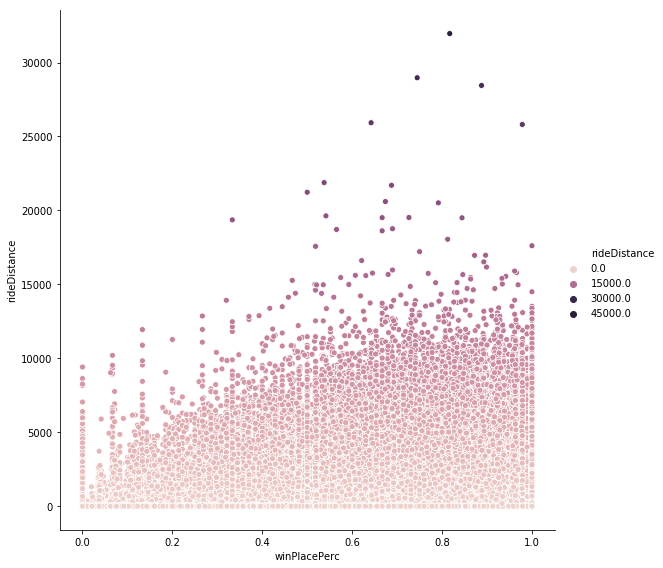

In [33]:
sns.relplot(x="winPlacePerc", y="rideDistance", data=train,hue="rideDistance", height=8)
plt.show()

There is a small correlation between rideDistance and winPlacePerc.

Destroying a vehicle in my experience shows that a player has skills.

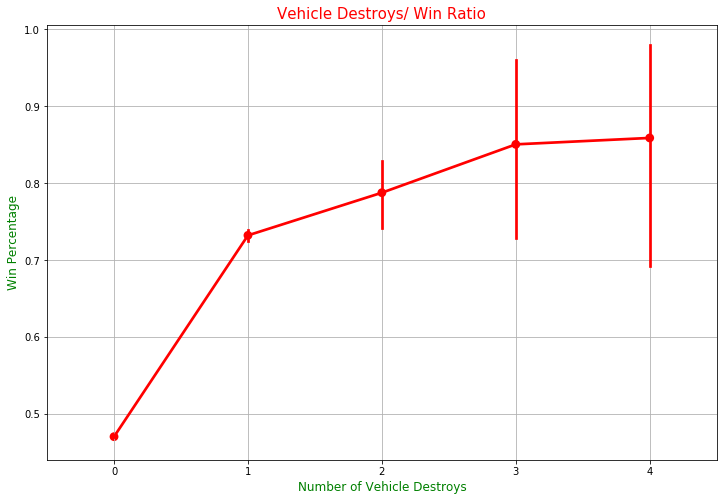

In [34]:
f,ax1 = plt.subplots(figsize =(12,8))

sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=train,color='red',alpha=0.8)

plt.xlabel('Number of Vehicle Destroys',fontsize = 12,color='green')
plt.ylabel('Win Percentage',fontsize = 12,color='green')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 15,color='red')

plt.grid()
plt.show()

My experience was correct. Destroying a single vehicle increases your chances of winning!

<h3><font color='green'>3.3.1 Outliers

In [35]:
# rideDistance anomalies
display(train[train['rideDistance'] >= 50000].shape)
train[train['rideDistance'] >= 50000].head(10)

(0, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate


In [36]:
# Remove outliers
train.drop(train[train['rideDistance'] >= 50000].index, inplace=True)

<h2><font color='orange'>3.4 swimDistance

<img src="https://i.ytimg.com/vi/tQxzsE0DijQ/maxresdefault.jpg" style="width: 750px;"/>

In [37]:
print("The average person swims for {:.1f}m.".format(train['swimDistance'].mean()))

print("99% of people have swimemd {}m or less".format(train['swimDistance'].quantile(0.99)))

print("while the olympic champion swimmed for {}m.".format(train['swimDistance'].max()))

The average person swims for 4.5m.
99% of people have swimemd 122.5m or less
while the olympic champion swimmed for 2295.0m.


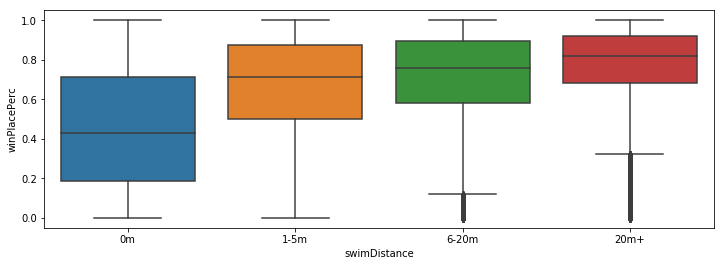

In [38]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(12,4))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

It seems that if you swim, you rise to the top. In PUBG there are currently 3 maps.

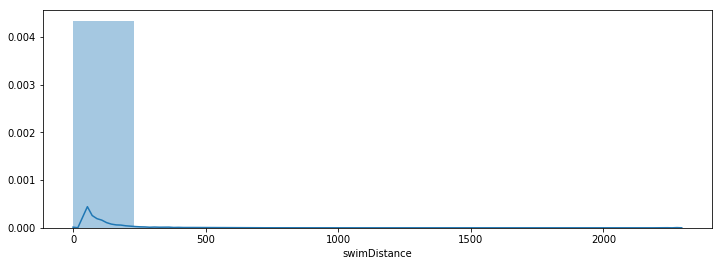

In [39]:
# Plot the distribution of swimDistance
plt.figure(figsize=(12,4))
sns.distplot(train['swimDistance'], bins=10)
plt.show()

<h4><font color='green'>3.4.1 Outliers

In [40]:
# Players who swam more than 2 km
train[train['swimDistance'] >= 2000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5,78.12,1,0,1,47,...,2295.0,0,0,1002.0,4,1466,0.9592,3297.0,False,0.0
274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4,53.32,0,0,16,39,...,2148.0,0,0,2276.0,5,0,0.9600,10113.0,False,0.0


In [41]:
# Remove outliers
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

<h2><font color='orange'>3.5 heals & boost

<img src="https://i.ytimg.com/vi/SA9imPvkc_c/maxresdefault.jpg" style="width: 650px;"/>

In [42]:
print("The average person uses {:.1f} heal items".format(train['heals'].mean()))

print("99% of people use {} or less".format(train['heals'].quantile(0.99)))

print("while the boost used {}.".format(train['boosts'].max()))

The average person uses 1.4 heal items
99% of people use 12.0 or less
while the boost used 33.


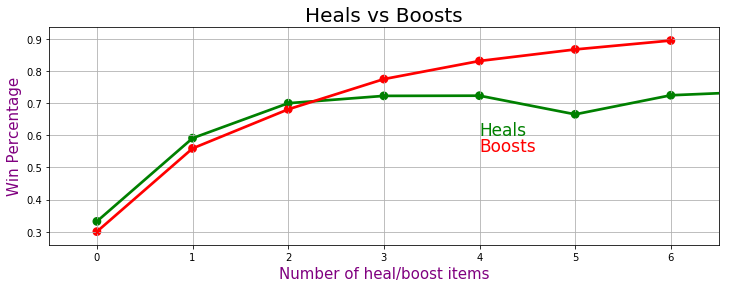

In [43]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(12,4))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='green',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='red',alpha=0.8)

plt.text(4,0.55,'Boosts',color='red',fontsize = 17)
plt.text(4,0.6,'Heals',color='green',fontsize = 17)

plt.xlabel('Number of heal/boost items',fontsize = 15,color='purple')
plt.ylabel('Win Percentage',fontsize = 15,color='purple')
plt.title('Heals vs Boosts',fontsize = 20,color='black')
plt.grid()
plt.show()

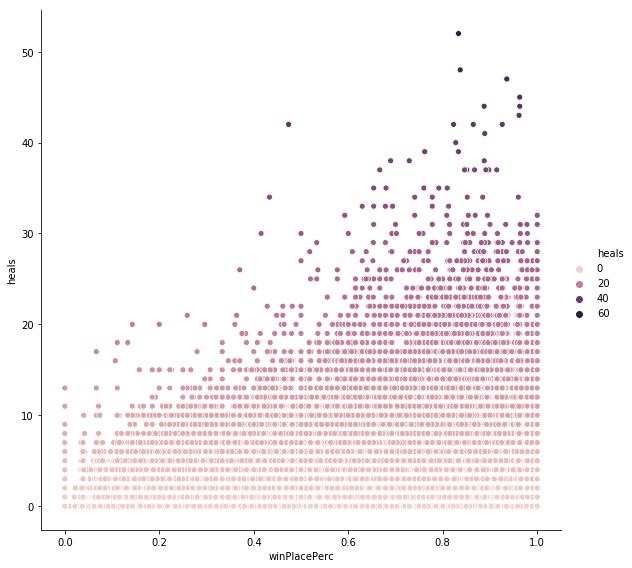

In [44]:
sns.relplot(x="winPlacePerc", y="heals", data=train,hue="heals" ,height=8)
plt.show()

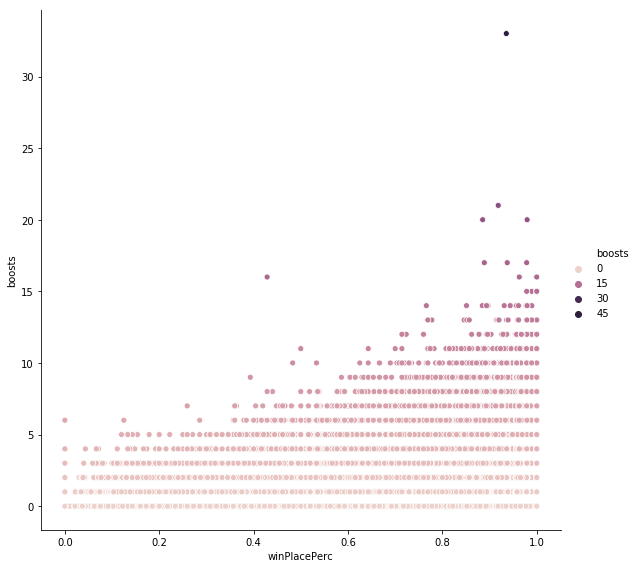

In [45]:
sns.relplot(x="winPlacePerc", y="boosts", data=train,hue="boosts" ,height=8)
plt.show()

So healing and boosting, definitely are correlated with winPlacePerc. Boosting is more.

<h4><font color='green'>3.5.1 Outliers

In [46]:
# 40 or more healing items used
display(train[train['boosts'] >= 40].shape)
train[train['boosts'] >= 40].head(10)

(0, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate


In [47]:
# Remove outliers
train.drop(train[train['boosts'] >= 40].index, inplace=True)

<h4><font color='green'>3.5.2 Outliers

In [48]:
# 40 or more healing items used
display(train[train['heals'] >= 40].shape)
train[train['heals'] >= 40].head(10)

(14, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
18405,63ab976895d860,927eeba5614c4f,69473402649f11,0,2,0.0,0,0,47,43,...,0.000,0,0,1387.0,6,0,0.9368,6854.000,False,0.000000
54463,069ddee7c9d26a,58ab5a1ce8e06f,942416b6caf21e,1,4,182.0,0,1,43,21,...,292.400,0,0,2791.0,7,0,0.9615,3083.400,False,1.000000
126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.0,0,0,52,49,...,3.443,0,0,1340.0,3,1543,0.8333,1343.443,False,0.000000
259351,86910c38335c2f,2738398928d28c,7d2911e944bfaa,0,10,0.0,0,0,42,45,...,0.000,0,0,1510.0,6,0,0.8646,7444.000,False,0.000000
268747,a007734fbc6ebf,5bf702dfa1e5d4,ad6b5669d33a2c,0,5,0.0,0,0,48,43,...,0.000,0,0,1968.0,9,0,0.8370,5816.000,False,0.000000
269098,a0891dbc2950ea,dde848d90491ba,b4fd3348551b73,0,2,0.0,0,0,42,44,...,0.000,0,0,2439.0,2,1511,0.9259,2439.000,False,0.000000
284195,91a2fb00455eb3,f639b09774c5b1,65b73c71653822,0,3,123.0,0,0,40,52,...,0.000,0,0,2252.0,8,0,0.8276,4848.000,False,0.000000
300204,1f4f2efc86bfcb,3d668492d1fca9,d3638466a43d38,0,6,175.0,2,1,47,25,...,0.000,0,0,2928.0,3,1562,0.9355,3415.600,False,1.000000
349908,7725ad71ad2ff7,4b2a7cf86d1546,cfa2775c9ef944,3,0,2348.0,0,8,41,9,...,0.000,0,0,268.8,33,1500,0.8889,268.800,False,0.296296
375156,d64866c78ebcb0,aa0f089ae6430c,4dbc4ebba33ec6,0,7,278.5,3,1,44,3,...,0.000,0,0,2489.0,6,1517,0.9630,4927.000,False,0.250000


In [49]:
# Remove outliers
train.drop(train[train['heals'] >= 40].index, inplace=True)

<h2><font color='orange'>3.6 Weapons

<img src="https://images.news18.com/ibnlive/uploads/2019/05/PUBG-Mobile-best-weapons1.jpg" style="width: 650px;"/>

In [50]:
print("The average person uses {:.1f} weapons".format(train['weaponsAcquired'].mean()))

print("99% of people use {} or less".format(train['weaponsAcquired'].quantile(0.99)))

print("while the weapons used {}.".format(train['weaponsAcquired'].max()))

The average person uses 3.7 weapons
99% of people use 10.0 or less
while the weapons used 128.


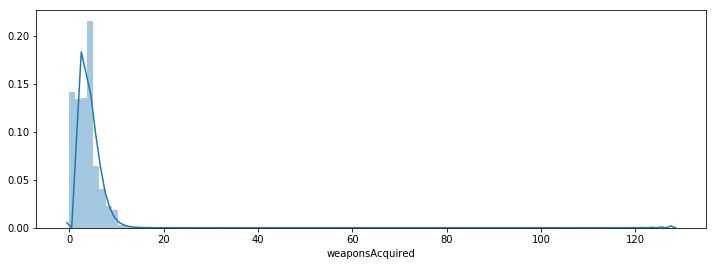

In [51]:
# Plot the distribution of weaponsAcquired
plt.figure(figsize=(12,4))
sns.distplot(train['weaponsAcquired'], bins=100)
plt.show()

In [52]:
print("{} players ({:.4f}%) acquired weapons".format(len(data[data['weaponsAcquired'] == 0]),
                                                     100*len(data1[data1['weaponsAcquired']==0])/len(train)))

print("This means that they died beforer taking weapons")

25340 players (4.4140%) acquired weapons
This means that they died beforer taking weapons


<h4><font color='green'>3.6.1 Outliers

In [53]:
# Players who acquired more than 80 weapons
display(train[train['weaponsAcquired'] >= 80].shape)
train[train['weaponsAcquired'] >= 80].head()

(1, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,headshot_rate
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,0.0,0,0,1307.0,128,1577,0.7111,3187.0,False,0.0


In [54]:
# Remove outliers
train.drop(train[train['weaponsAcquired'] >= 80].index, inplace=True)

<h2><font color='orange'>3.7 Solos, Duos and Squads

<img src="https://i.gadgets360cdn.com/large/pubg_mobile_GRW_1542378402733.jpg?output-quality=80&output-format=webp" style="width: 650px;"/>

There are 3 game modes in the game. One can play solo, or with a friend (duo), or with 3 other friends (squad). 100 players join the same server, so in the case of duos the max teams are 50 and in the case of squads the max teams are 25. 

In [55]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]

print("There are {} ({:.2f}%) solo games".format(len(solos), 100*len(solos)/len(train),))

print("There are {} ({:.2f}%) duo games".format(len(duos), 100*len(duos)/len(train)))

print("There are {} ({:.2f}%) squad games".format(len(squads), 100*len(squads)/len(train),))

There are 79478 (15.90%) solo games
There are 370635 (74.16%) duo games
There are 49654 (9.94%) squad games


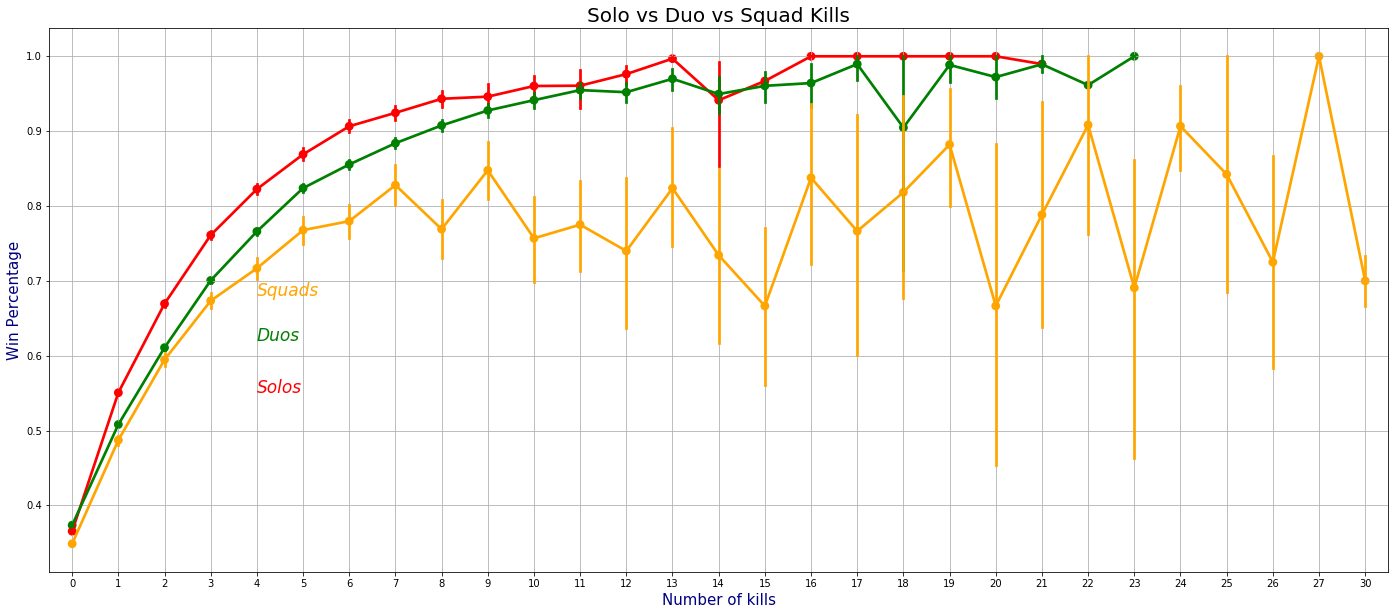

In [56]:
plt.subplots(figsize=(24,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='red',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='green',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='orange',alpha=0.8)

plt.text(4,0.55,'Solos',color='red',fontsize = 17,style = 'italic')
plt.text(4,0.62,'Duos',color='green',fontsize = 17,style = 'italic')
plt.text(4,0.68,'Squads',color='orange',fontsize = 17,style = 'italic')

plt.xlabel('Number of kills',fontsize = 15,color='navy')
plt.ylabel('Win Percentage',fontsize = 15,color='navy')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='black')

plt.grid()
plt.show()

- Solos and duos behave the same, but when playing squads kills don't matter that much.

The attribute DBNOs means enemy players knocked. A "knock" can happen only in duos or squads, because the teammates have the chance to "revive" the knocked player in a given time. So a knocked player can be revived or die. If he is revived, the next time he will be knocked, his teammates will have less time to revive him.

The attribute assist can also happen only in duos or squads. It generally means that the player had an involvement in a kill.

The attribute revive also happens in duos or squads.

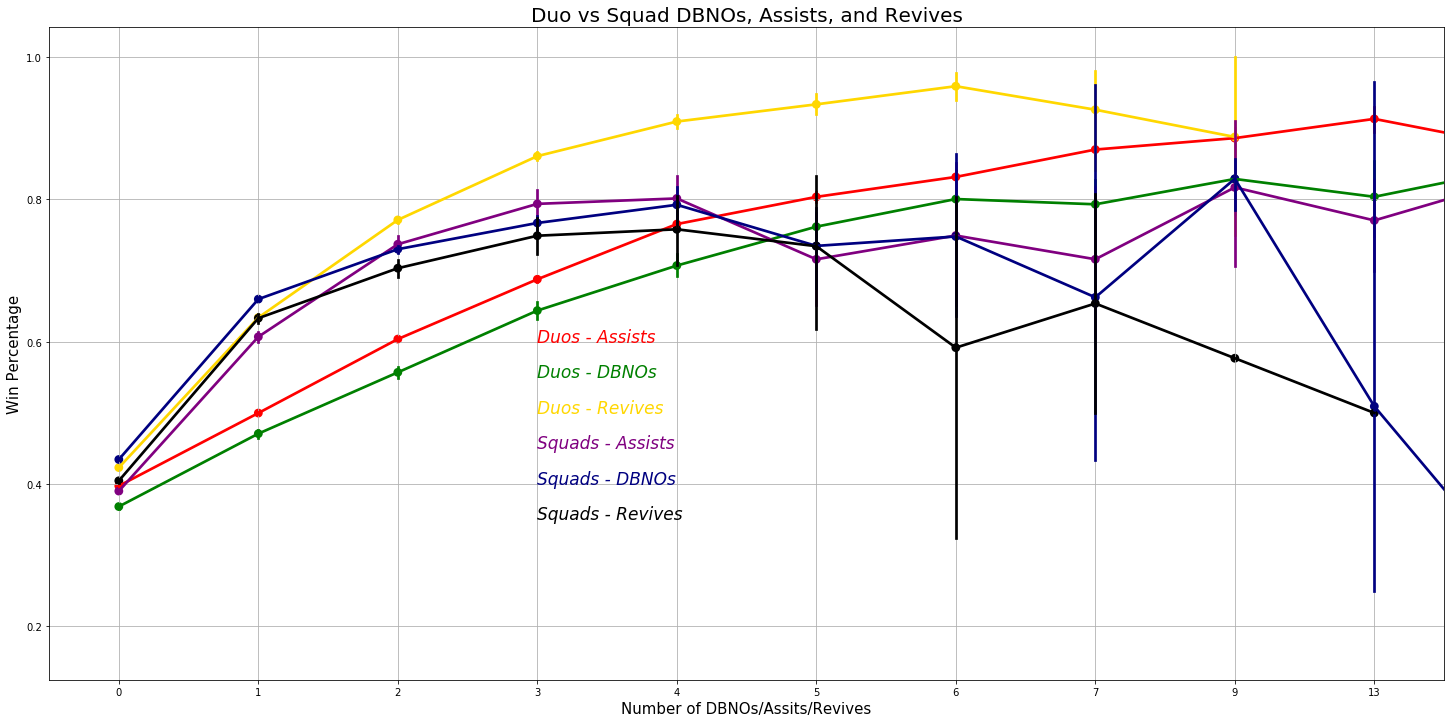

In [57]:
f,ax1 = plt.subplots(figsize =(25,12))

sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='red',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='green',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='gold',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='purple',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='navy',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='black',alpha=0.8)

plt.text(3,0.6,'Duos - Assists',color='red',fontsize = 17,style = 'italic')
plt.text(3,0.55,'Duos - DBNOs',color='green',fontsize = 17,style = 'italic')
plt.text(3,0.50,'Duos - Revives',color='gold',fontsize = 17,style = 'italic')
plt.text(3,0.45,'Squads - Assists',color='purple',fontsize = 17,style = 'italic')
plt.text(3,0.40,'Squads - DBNOs',color='navy',fontsize = 17,style = 'italic')
plt.text(3,0.35,'Squads - Revives',color='black',fontsize = 17,style = 'italic')

plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='black')
plt.grid()
plt.show()

<h2><font color='orange'>3.8 match type

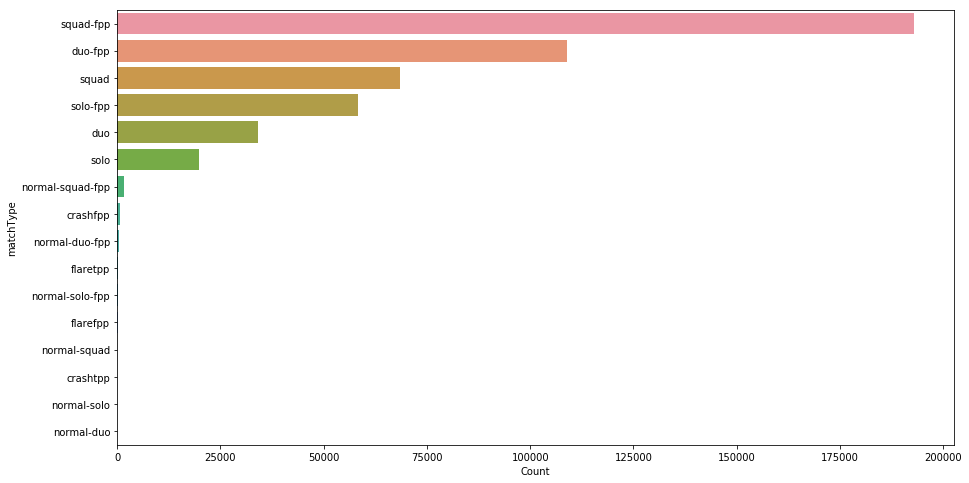

In [58]:
f,ax = plt.subplots(figsize=(15,8))
sns.barplot(data.matchType.value_counts().values,data.matchType.value_counts().index)
plt.xlabel('Count')
plt.ylabel('matchType')
plt.show()

We will one hot encode the matchType

In [59]:
print('There are {} different Match types in the dataset.'.format(train['matchType'].nunique()))

There are 16 different Match types in the dataset.


<h4><font color='green'>3.8.1 one hot encoding matchtype on train 

In [60]:
# One hot encode matchType
train = pd.get_dummies(train, columns=['matchType'])

# Take a look at the encoding
matchType_encoding = train.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


There are a lot of groupId's and matchId's so one-hot encoding them is computational suicide.
We will turn them into category codes.

<h3><font color='orange'>3.9 Removing unnecessary columns from trainig and test data set

In [61]:
# Drop Id column, because it probably won't be useful for our Machine Learning algorithm,
# because the test set contains different Id's

train.drop(columns=['groupId','Id', 'matchId'], inplace=True)

 - Added features to train so we need to remove

In [62]:
train.drop(columns=['totalDistance','killsWithoutMoving', 'headshot_rate'], inplace=True)

In [63]:
# Check dimensions of data
print('train data shape: ', train.shape)

train data shape:  (499767, 41)


<h1><font color='purple'>4 Preparation for Machine Learning

<h2><font color='green'>Feature Engineering

In [0]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import gc

#Figures Inline and Visualization style
%matplotlib inline
sb.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('drive/My Drive/pubg/train_V2.csv')
test = pd.read_csv('drive/My Drive/pubg/test_V2.csv')
train.dropna(inplace=True)

In [4]:
train['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

'groupId' and 'matchId' are available in the data. From these, no. of players in the team and total players entered in the match can be extracted.

In [0]:
train['teamPlayers']=train.groupId.map(train.groupId.value_counts())
test['teamPlayers']=test.groupId.map(test.groupId.value_counts())
train['gamePlayers']=train.matchId.map(train.matchId.value_counts())
test['gamePlayers']=test.matchId.map(test.matchId.value_counts())

new column with total enemy players . The players remaining other than the player's squad.

In [0]:
train['enemyPlayers']=train['gamePlayers']-train['teamPlayers']
test['enemyPlayers']=test['gamePlayers']-test['teamPlayers']

new column representing the total distance(ride+swim+walk) covered by the player in the game.

In [0]:
train['totalDistance']=train['rideDistance']+train['swimDistance']+train['walkDistance']
test['totalDistance']=test['rideDistance']+test['swimDistance']+test['walkDistance']

new column which is the sum of assists and kills.

In [0]:
train['enemyDamage']=train['assists']+train['kills']
test['enemyDamage']=test['assists']+test['kills']

new column containing total kills by the team.

In [0]:
totalKills = train.groupby(['matchId','groupId']).agg({'kills': lambda x: x.sum()})
totalKills.rename(columns={"kills": "squadKills"}, inplace=True)
train = train.join(other=totalKills, on=['matchId', 'groupId'])
totalKills = test.groupby(['matchId','groupId']).agg({'kills': lambda x: x.sum()})
totalKills.rename(columns={"kills": "squadKills"}, inplace=True)
test = test.join(other=totalKills, on=['matchId', 'groupId'])

In [0]:
train['medicKits']=train['heals']+train['boosts']
test['medicKits']=test['heals']+test['boosts']

In [0]:
train['medicPerKill'] = train['medicKits']/train['enemyDamage']
test['medicPerKill'] = test['medicKits']/test['enemyDamage']

In [0]:
train['distancePerHeals'] = train['totalDistance']/train['heals']
test['distancePerHeals'] = test['totalDistance']/test['heals']

In [0]:
train['headShotKillRatio']=train['headshotKills']/train['kills']
test['headShotKillRatio']=test['headshotKills']/test['kills']

In [0]:
train['headshotKillRate'] = train['headshotKills'] / train['kills']
test['headshotKillRate'] = test['headshotKills'] / test['kills']

In [0]:
train['killPlaceOverMaxPlace'] = train['killPlace'] / train['maxPlace']
test['killPlaceOverMaxPlace'] = test['killPlace'] / test['maxPlace']

In [0]:
train['kills/distance']=train['kills']/train['totalDistance']
test['kills/distance']=test['kills']/test['totalDistance']

In [0]:
train['kills/walkDistance']=train['kills']/train['walkDistance']
test['kills/walkDistance']=test['kills']/test['walkDistance']

In [0]:
train['avgKills'] = train['squadKills']/train['teamPlayers']
test['avgKills'] = test['squadKills']/test['teamPlayers']

In [0]:
train['damageRatio'] = train['damageDealt']/train['enemyDamage']
test['damageRatio'] = test['damageDealt']/test['enemyDamage']

In [0]:
train['distTravelledPerGame'] = train['totalDistance']/train['matchDuration']
test['distTravelledPerGame'] = test['totalDistance']/test['matchDuration']

In [0]:
train['killPlacePerc'] = train['killPlace']/train['gamePlayers']
test['killPlacePerc'] = test['killPlace']/test['gamePlayers']

In [0]:
train["playerSkill"] = train["headshotKills"]+ train["roadKills"]+train["assists"]-(5*train['teamKills']) 
test["playerSkill"] = test["headshotKills"]+ test["roadKills"]+test["assists"]-(5*test['teamKills'])

In [0]:
train['gamePlacePerc'] = train['killPlace']/train['maxPlace']
test['gamePlacePerc'] = test['killPlace']/test['maxPlace']

if newly created features contains missing values and Infinity values in it. replace these with 0.

In [0]:
train.fillna(0,inplace=True)
train.replace(np.inf, 0, inplace=True)
test.fillna(0,inplace=True)
test.replace(np.inf, 0, inplace=True)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 49 columns):
Id                       object
groupId                  object
matchId                  object
assists                  int64
boosts                   int64
damageDealt              float64
DBNOs                    int64
headshotKills            int64
heals                    int64
killPlace                int64
killPoints               int64
kills                    int64
killStreaks              int64
longestKill              float64
matchDuration            int64
matchType                object
maxPlace                 int64
numGroups                int64
rankPoints               int64
revives                  int64
rideDistance             float64
roadKills                int64
swimDistance             float64
teamKills                int64
vehicleDestroys          int64
walkDistance             float64
weaponsAcquired          int64
winPoints                int64
winPl

From the heat map, killPoints, rankPoints, winPoints, maxPlace are found to be not having any significance in determining winPlacePerc. So let's remove these features from the data set.

In [0]:
train.drop(columns=['killPoints','rankPoints','winPoints','maxPlace'],inplace=True)
test.drop(columns=['killPoints','rankPoints','winPoints','maxPlace'],inplace=True)

In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage, took from Kaggle.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                    
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In Pubg, if a player wins, his team mates are also winners. So instead on finding winPlacePerc for individual payers, let's find the winPlacePerc for each group in a match. Let's write a function that will create new columns that are the match wise and group wise mean, max, min of all the current features and also rank them.

In [0]:
def feature(df):
    features = list(df.columns)
    features.remove("Id")
    features.remove("matchId")
    features.remove("groupId")
    features.remove("matchType")
    condition='False'
    
    if 'winPlacePerc' in df.columns:
        y = np.array(df.groupby(['matchId','groupId'])['winPlacePerc'].agg('mean'), dtype=np.float64)
        features.remove("winPlacePerc")
        condition='True'
        
    print("get group mean feature")
    agg = df.groupby(['matchId','groupId'])[features].agg('mean')
    agg_rank = agg.groupby('matchId')[features].rank(pct=True).reset_index()
    df_out = agg.reset_index()[['matchId','groupId']]
    df_out = df_out.merge(agg.reset_index(), suffixes=["", ""], how='left', on=['matchId', 'groupId'])
    df_out = df_out.merge(agg_rank, suffixes=["_mean", "_mean_rank"], how='left', on=['matchId', 'groupId'])
        
    print("get group max feature")
    agg = df.groupby(['matchId','groupId'])[features].agg('max')
    agg_rank = agg.groupby('matchId')[features].rank(pct=True).reset_index()
    df_out = df_out.merge(agg.reset_index(), suffixes=["", ""], how='left', on=['matchId', 'groupId'])
    df_out = df_out.merge(agg_rank, suffixes=["_max", "_max_rank"], how='left', on=['matchId', 'groupId'])
    
    print("get group min feature")
    agg = df.groupby(['matchId','groupId'])[features].agg('min')
    agg_rank = agg.groupby('matchId')[features].rank(pct=True).reset_index()
    df_out = df_out.merge(agg.reset_index(), suffixes=["", ""], how='left', on=['matchId', 'groupId'])
    df_out = df_out.merge(agg_rank, suffixes=["_min", "_min_rank"], how='left', on=['matchId', 'groupId'])
    
    print("get match mean feature")
    agg = df.groupby(['matchId'])[features].agg('mean').reset_index()
    df_out = df_out.merge(agg, suffixes=["", "_match_mean"], how='left', on=['matchId'])
    df_id=df_out[["matchId", "groupId"]].copy()
    df_out.drop(["matchId", "groupId"], axis=1, inplace=True)
    
    del df, agg, agg_rank
    gc.collect()
    if condition=='True':
        return df_out,pd.DataFrame(y),df_id
    else:
        return df_out,df_id

In [29]:
x,y,id_train=feature(reduce_mem_usage(train))
x_test,id_test=feature(reduce_mem_usage(test))

Memory usage of dataframe is 1560.67 MB
Memory usage after optimization is: 436.82 MB
Decreased by 72.0%
get group mean feature
get group max feature
get group min feature
get match mean feature
Memory usage of dataframe is 649.29 MB
Memory usage after optimization is: 171.55 MB
Decreased by 73.6%
get group mean feature
get group max feature
get group min feature
get match mean feature


In [30]:
del train,test
gc.collect()

21

<h2><font color='green'>GRADIENT BOOSTING MODEL

Split the data into train and validation set

In [31]:
x['matchId']=id_train['matchId']
x['groupId']=id_train['groupId']
# Train test split
x_train,x_val,y_train,y_val=train_test_split(reduce_mem_usage(x),y,test_size=.1)
x_test=reduce_mem_usage(x_test)
id_val=x_val[['matchId','groupId']]
x_val.drop(['matchId','groupId'],axis=1,inplace=True)
x_train.drop(['matchId','groupId'],axis=1,inplace=True)
x.drop(['matchId','groupId'],axis=1,inplace=True)
del y
gc.collect()

Memory usage of dataframe is 2957.27 MB
Memory usage after optimization is: 1055.34 MB
Decreased by 64.3%
Memory usage of dataframe is 1279.61 MB
Memory usage after optimization is: 447.10 MB
Decreased by 65.1%


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


7

In [0]:
params = {
        "objective" : "regression", 
        "metric" : "mae", 
        "num_leaves" : 149, 
        "learning_rate" : 0.03, 
        "bagging_fraction" : 0.9,
        "bagging_seed" : 0, 
        "num_threads" : 4,
        "colsample_bytree" : 0.5,
        'min_data_in_leaf':1900, 
        'min_split_gain':0.00011,
        'lambda_l2':9
}

In [0]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(x_train, y_train,
                       free_raw_data=False)
lgb_eval = lgb.Dataset(x_val, y_val, reference=lgb_train,
                      free_raw_data=False)

In [34]:
model = lgb.train(params,
                lgb_train,
                num_boost_round=22000,
                valid_sets=lgb_eval,
                early_stopping_rounds=10,
                verbose_eval=1000)

Training until validation scores don't improve for 10 rounds.
[1000]	valid_0's l1: 0.0279616
[2000]	valid_0's l1: 0.0272089
[3000]	valid_0's l1: 0.0268065
[4000]	valid_0's l1: 0.0265105
[5000]	valid_0's l1: 0.0263117
Early stopping, best iteration is:
[5943]	valid_0's l1: 0.0261426


Now that we have trained the model, let' have a look if we can make some tweaks in the predicted data so that the predicted value can be improved. First let's merge the predicted value with appropriate gamer Id in the train data.

In [35]:
y_pred_val = model.predict(x, num_iteration=model.best_iteration)
id_train['win_pred']=y_pred_val
id_train.set_index(['matchId','groupId'])
train = reduce_mem_usage(pd.read_csv("drive/My Drive/pubg/train_V2.csv"))

df=pd.merge(train,id_train,on=['matchId','groupId'],how='right')
df.head()

Memory usage of dataframe is 983.90 MB
Memory usage after optimization is: 288.39 MB
Decreased by 70.7%


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,win_pred
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00000,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.75000,1,1466,0.444336,0.462668
1,7516514fbd1091,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,62,1232,0,0,0.00000,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,48.28125,1,1465,0.444336,0.462668
2,c56d45be16aa86,4d4b580de459be,a10357fd1a4a91,0,0,318.00,2,1,0,6,1185,4,1,27.65625,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,342.75000,2,1476,0.444336,0.462668
3,100eef17c4d773,4d4b580de459be,a10357fd1a4a91,0,0,90.75,0,0,0,61,1344,0,0,0.00000,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,96.06250,1,1498,0.444336,0.462668
4,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50,0,0,0,57,0,0,0,0.00000,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.00000,5,0,0.640137,0.627268


In [36]:
print('The mae score is {}'.format(mean_absolute_error(df['winPlacePerc'],df['win_pred'])))
df = df[["Id", "matchId", "groupId", "maxPlace", "numGroups",'winPlacePerc', 'win_pred']]

The mae score is 0.020879417399560927


In [0]:
df_grouped = df.groupby(["matchId", "groupId"]).first().reset_index()
df_grouped["team_place"] = df_grouped.groupby(["matchId"])["win_pred"].rank()

In [0]:
df_grouped["win_perc"] = (df_grouped["team_place"] - 1) / (df_grouped["numGroups"]-1)
df = df.merge(df_grouped[["win_perc","matchId", "groupId"]], on=["matchId", "groupId"], how="left")

In [0]:
df.loc[df['maxPlace'] == 0, "win_perc"] = 0
df.loc[df['maxPlace'] == 1, "win_perc"] = 1
df.loc[(df['maxPlace'] > 1) & (df['numGroups'] == 1), "win_perc"] = 0
df.loc[df['win_perc'] < 0,"win_perc"] = 0
df.loc[df['win_perc'] > 1,"win_perc"] = 1
df['win_perc'].fillna(df['win_pred'],inplace=True)

In [40]:
df_grouped[df_grouped['maxPlace']>1][['winPlacePerc','win_perc','maxPlace','numGroups','team_place']]

,winPlacePerc,win_perc,maxPlace,numGroups,team_place
0,0.333252,0.333333,28,28,10.0
1,0.036987,0.037037,28,28,2.0
2,0.000000,0.000000,28,28,1.0
3,0.370361,0.370370,28,28,11.0
4,1.000000,0.925926,28,28,26.0
5,0.592773,0.592593,28,28,17.0
6,0.777832,0.851852,28,28,24.0
7,0.703613,0.629630,28,28,18.0
8,0.259277,0.259259,28,28,8.0
9,0.666504,0.703704,28,28,20.0


In [0]:
subset = df.loc[df['maxPlace'] > 1]
gap = 1 / (subset['maxPlace'].values-1)
new_perc = np.around(subset['win_perc'].values / gap) * gap
df.loc[df.maxPlace > 1, "win_perc"] = new_perc

In [42]:
print('The new mae score is {}'.format(mean_absolute_error(df['winPlacePerc'],df['win_perc'])))

The new mae score is 0.01777692776241997


In [43]:
del x,train,df
gc.collect()

28

<h2><font color='green'>Submission

In [44]:
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
id_test['win_pred']=y_pred
id_test.set_index(['matchId','groupId'])
del x_train,x_val,y_train,y_val,x_test
gc.collect()

test = reduce_mem_usage(pd.read_csv("drive/My Drive/pubg/test_V2.csv"))
df=pd.merge(test,id_test,on=['matchId','groupId'],how='right')
del id_test,test
gc.collect()
df.head()

Memory usage of dataframe is 413.18 MB
Memory usage after optimization is: 121.74 MB
Decreased by 70.5%


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,win_pred
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46875,0,0,0,73,0,0,0,0.0,1884,squad-fpp,28,28,1500,0,0.0,0,0.0,0,0,588.00,1,0,0.196744
1,d6267a32c5709c,676b23c24e70d6,45b576ab7daa7f,0,0,0.00000,0,0,0,71,0,0,0,0.0,1884,squad-fpp,28,28,1368,0,2694.0,0,0.0,0,0,549.50,0,0,0.196744
2,b896f8954a92e2,676b23c24e70d6,45b576ab7daa7f,1,0,74.18750,1,0,0,72,0,0,0,0.0,1884,squad-fpp,28,28,1429,0,0.0,0,0.0,0,0,386.25,7,0,0.196744
3,2f134f2c7be198,676b23c24e70d6,45b576ab7daa7f,0,0,0.00000,0,0,0,70,0,0,0,0.0,1884,squad-fpp,28,28,1488,0,0.0,0,0.0,0,0,913.00,2,0,0.196744
4,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.12500,0,0,2,11,0,2,1,362.0,1811,duo-fpp,48,47,1503,2,4668.0,0,0.0,0,0,2017.00,6,0,0.944383


In [0]:
df = df[["Id", "matchId", "groupId", "maxPlace", "numGroups",'win_pred']]

In [0]:
df_grouped = df.groupby(["matchId", "groupId"]).first().reset_index()
df_grouped["team_place"] = df_grouped.groupby(["matchId"])["win_pred"].rank()

In [0]:
df_grouped["win_perc"] = (df_grouped["team_place"] - 1) / (df_grouped["numGroups"]-1)
df = df.merge(df_grouped[["win_perc", "matchId", "groupId"]], on=["matchId", "groupId"], how="left")

In [0]:
df.loc[df.maxPlace == 0, "win_perc"] = 0
df.loc[df.maxPlace == 1, "win_perc"] = 1
df.loc[(df.maxPlace > 1) & (df.numGroups == 1), "win_perc"] = 0
df.loc[df['win_perc'] < 0,"win_perc"] = 0
df.loc[df['win_perc'] > 1,"win_perc"] = 1
df['win_perc'].fillna(df['win_pred'],inplace=True)

In [0]:
subset = df.loc[df['maxPlace'] > 1]
gap = 1 / (subset['maxPlace'].values-1)
new_perc = np.around(subset['win_perc'].values / gap) * gap
df.loc[df.maxPlace > 1, "win_perc"] = new_perc
df['winPlacePerc']=df['win_perc']

In [0]:
df=df[['Id','winPlacePerc']]
df.to_csv("drive/My Drive/pubg/submission_final.csv", index=False)

<b> Conclusion </b>

- we seen kernel features
- killer
     - Kill without movement
     - Road kils
     - more than 30 kills
     - 100% headshot
     - longest kills
      features and removed the outlier features of this killers and plotted the killer features
      
- we seen the walkDistance feature and most winners are walk more than others and plotted this and removed the ouliers
- we plot rideDistance distance and removed the outliers
- swimDistance most of them winners are not much swim than 2000 meters and removed the outliers
- most of the winners are rideDistance more than 5000 meters and removed the outliers
- all players are Healers & Boosts used much 
- most of the winners are used less than 10 weapons and removed outliers
- players are played Solos, Duos and Squads with other players
- and one hot encoded match type 
- we split the data train and test data
- and lastly perform the machine learning models on train and test data
- above the Random Forest perform very well on data


<img src="https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/06/30/Pictures/_802421c8-7c33-11e8-8d5f-3f0c905295d2.jpg" style="width: 850px;"/>